In [1]:
import e_utils
import e_networks
import e_ensemble
from e_plot_utils import plot_summary

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, WeightedRandomSampler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
train_set = datasets.ImageFolder(root=e_utils.dirs['train'], transform=e_utils.transform['train'])
val_set = datasets.ImageFolder(root=e_utils.dirs['val'], transform=e_utils.transform['eval'])

In [3]:
class_freq = torch.as_tensor(train_set.targets).bincount()
weight = 1 / class_freq
samples_weight = weight[train_set.targets]
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

train_dl = DataLoader(train_set, batch_size=10, sampler=sampler, num_workers=2, worker_init_fn=e_utils.wif)
valid_dl = DataLoader(val_set, batch_size=20)

In [4]:
epochs = 10
criterion = nn.CrossEntropyLoss()

### AlexNet

In [5]:
alexnet = e_networks.get_alexnet(pretrained=True, out_features=4)
alexnet=alexnet.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
e_utils.fit(
    epochs=epochs,
    model=alexnet,
    criterion=criterion,
    optimizer=optim.Adam(inception_v3.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|███████████████████████████████████████| 4693/4693 [08:34<00:00,  9.12it/s, acc=0.882, loss=0.0512]



		Avg train loss: 0.323709	Avg valid loss: 0.327990

		valid_loss decreased (inf -> 0.327990)
		saving model...



Epoch [ 2/10]: 100%|███████████████████████████████████████| 4693/4693 [08:32<00:00,  9.15it/s, acc=0.937, loss=0.0433]



		Avg train loss: 0.171252	Avg valid loss: 0.231597

		valid_loss decreased (0.327990 -> 0.231597)
		saving model...



Epoch [ 3/10]: 100%|████████████████████████████████████████| 4693/4693 [08:33<00:00,  9.14it/s, acc=0.949, loss=0.556]



		Avg train loss: 0.135754	Avg valid loss: 0.197310

		valid_loss decreased (0.231597 -> 0.197310)
		saving model...



Epoch [ 4/10]: 100%|███████████████████████████████████████| 4693/4693 [08:37<00:00,  9.07it/s, acc=0.955, loss=0.0417]



		Avg train loss: 0.122425	Avg valid loss: 0.220401



Epoch [ 5/10]: 100%|███████████████████████████████████████| 4693/4693 [08:39<00:00,  9.03it/s, acc=0.961, loss=0.0245]



		Avg train loss: 0.104076	Avg valid loss: 0.217897



Epoch [ 6/10]: 100%|███████████████████████████████████████| 4693/4693 [08:39<00:00,  9.04it/s, acc=0.964, loss=0.0899]



		Avg train loss: 0.099147	Avg valid loss: 0.184424

		valid_loss decreased (0.197310 -> 0.184424)
		saving model...



Epoch [ 7/10]: 100%|████████████████████████████████████████| 4693/4693 [08:44<00:00,  8.94it/s, acc=0.967, loss=0.004]



		Avg train loss: 0.092235	Avg valid loss: 0.186104



Epoch [ 8/10]: 100%|████████████████████████████████████████| 4693/4693 [08:39<00:00,  9.04it/s, acc=0.97, loss=0.0775]



		Avg train loss: 0.082581	Avg valid loss: 0.219488



Epoch [ 9/10]: 100%|███████████████████████████████████████| 4693/4693 [08:30<00:00,  9.19it/s, acc=0.972, loss=0.0273]



		Avg train loss: 0.077324	Avg valid loss: 0.165425

		valid_loss decreased (0.184424 -> 0.165425)
		saving model...



Epoch [10/10]: 100%|████████████████████████████████████████| 4693/4693 [08:33<00:00,  9.15it/s, acc=0.973, loss=0.191]



		Avg train loss: 0.074623	Avg valid loss: 0.212461



In [ ]:
plot_summary('outputs/CSVs/e_alexnet.csv')

### Inception_Net V3

In [5]:
inception_v3 = e_networks.get_inception_v3(pretrained=True, out_features=4)
inception_v3=inception_v3.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
e_utils.fit(
    epochs=epochs,
    model=inception_v3,
    criterion=criterion,
    optimizer=optim.Adam(inception_v3.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/1]: 100%|█████████████████████████████████████████| 4693/4693 [24:49<00:00,  3.15it/s, acc=0.915, loss=0.184]



		Avg train loss: 0.237322	Avg valid loss: 1.507517

		valid_loss decreased (inf -> 1.507517)
		saving model...



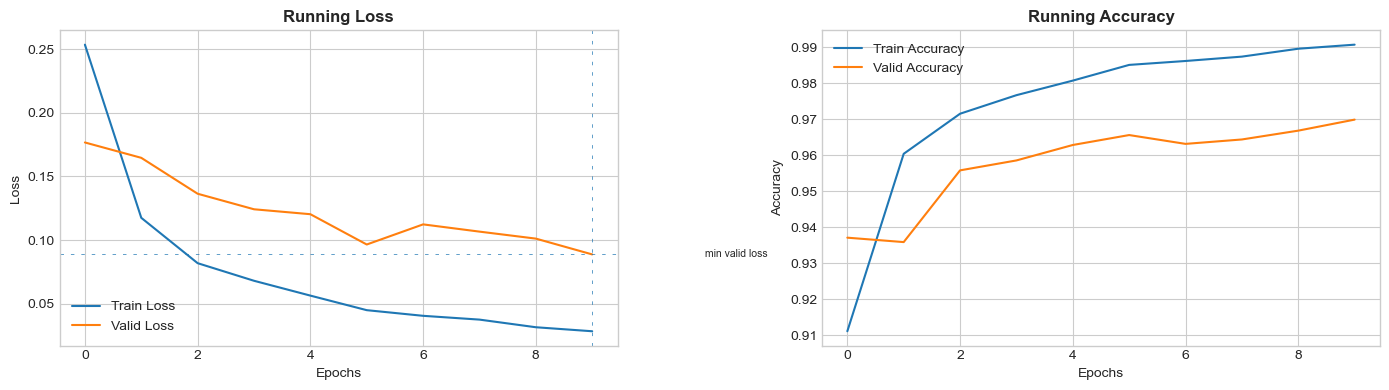

In [8]:
plot_summary('outputs/CSVs/e_inception3.csv')

### SqueezeNet

In [5]:
squeezenet1_0 = e_networks.get_squeezenet1_0(pretrained=True, out_features=4)
squeezenet1_0=squeezenet1_0.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
e_utils.fit(
    epochs=epochs,
    model=squeezenet1_0,
    criterion=criterion,
    optimizer=optim.Adam(squeezenet1_0.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|████████████████████████████████████████| 4693/4693 [09:38<00:00,  8.11it/s, acc=0.586, loss=0.628]



		Avg train loss: 1.114510	Avg valid loss: 0.847652

		valid_loss decreased (inf -> 0.847652)
		saving model...



Epoch [ 2/10]: 100%|██████████████████████████████████████████| 4693/4693 [09:37<00:00,  8.13it/s, acc=0.8, loss=0.121]



		Avg train loss: 0.523751	Avg valid loss: 0.576872

		valid_loss decreased (0.847652 -> 0.576872)
		saving model...



Epoch [ 3/10]: 100%|████████████████████████████████████████| 4693/4693 [09:45<00:00,  8.02it/s, acc=0.836, loss=0.554]



		Avg train loss: 0.425588	Avg valid loss: 0.538504

		valid_loss decreased (0.576872 -> 0.538504)
		saving model...



Epoch [ 4/10]: 100%|████████████████████████████████████████| 4693/4693 [09:39<00:00,  8.10it/s, acc=0.859, loss=0.341]



		Avg train loss: 0.365606	Avg valid loss: 0.506383

		valid_loss decreased (0.538504 -> 0.506383)
		saving model...



Epoch [ 5/10]: 100%|████████████████████████████████████████| 4693/4693 [09:57<00:00,  7.86it/s, acc=0.872, loss=0.509]



		Avg train loss: 0.333992	Avg valid loss: 0.506884



Epoch [ 6/10]: 100%|█████████████████████████████████████████| 4693/4693 [09:46<00:00,  8.00it/s, acc=0.88, loss=0.387]



		Avg train loss: 0.310453	Avg valid loss: 0.506725



Epoch [ 7/10]: 100%|████████████████████████████████████████| 4693/4693 [09:44<00:00,  8.03it/s, acc=0.888, loss=0.485]



		Avg train loss: 0.286876	Avg valid loss: 0.444246

		valid_loss decreased (0.506383 -> 0.444246)
		saving model...



Epoch [ 8/10]: 100%|████████████████████████████████████████| 4693/4693 [09:47<00:00,  7.99it/s, acc=0.896, loss=0.128]



		Avg train loss: 0.271872	Avg valid loss: 0.417580

		valid_loss decreased (0.444246 -> 0.417580)
		saving model...



Epoch [ 9/10]: 100%|████████████████████████████████████████| 4693/4693 [10:07<00:00,  7.73it/s, acc=0.901, loss=0.129]



		Avg train loss: 0.255425	Avg valid loss: 0.500779



Epoch [10/10]: 100%|████████████████████████████████████████| 4693/4693 [09:53<00:00,  7.91it/s, acc=0.908, loss=0.214]



		Avg train loss: 0.239098	Avg valid loss: 0.408548

		valid_loss decreased (0.417580 -> 0.408548)
		saving model...



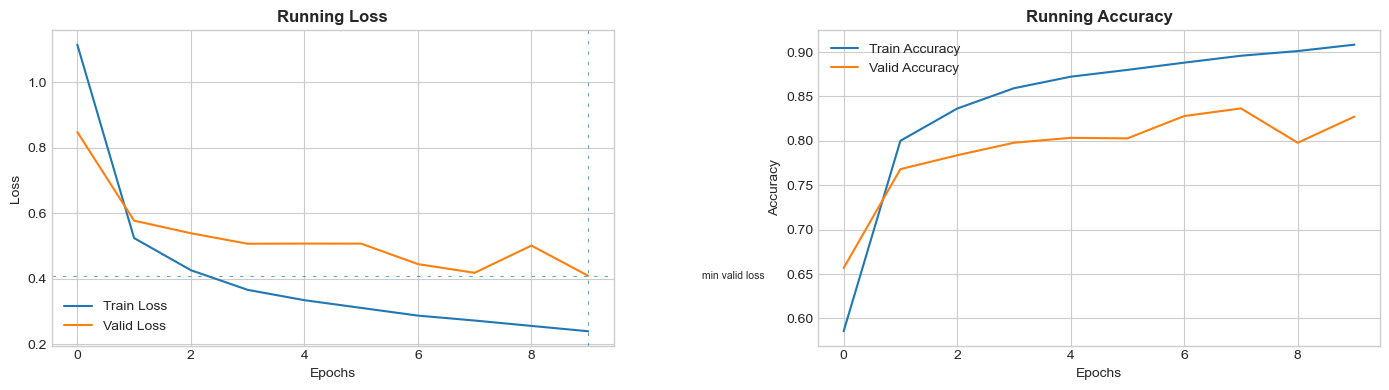

In [7]:
plot_summary('outputs/CSVs/e_squeezenet.csv')

### VGG-16

In [5]:
vgg16 = e_networks.get_vgg16(pretrained=True, out_features=4)
vgg16=vgg16.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
e_utils.fit(
    epochs=epochs,
    model=vgg16,
    criterion=criterion,
    optimizer=optim.Adam(vgg16.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|██████████| 7822/7822 [51:44<00:00,  2.52it/s, acc=0.918, loss=0.23]    



		Avg train loss: 0.220226	Avg valid loss: 0.126384

		valid_loss decreased (inf -> 0.126384)
		saving model...



Epoch [ 2/10]: 100%|██████████| 7822/7822 [51:45<00:00,  2.52it/s, acc=0.957, loss=0.00772]  



		Avg train loss: 0.125781	Avg valid loss: 0.123830

		valid_loss decreased (0.126384 -> 0.123830)
		saving model...



Epoch [ 3/10]: 100%|██████████| 7822/7822 [51:47<00:00,  2.52it/s, acc=0.966, loss=0.0412]    



		Avg train loss: 0.099629	Avg valid loss: 0.153915



Epoch [ 4/10]: 100%|██████████| 7822/7822 [52:04<00:00,  2.50it/s, acc=0.97, loss=0.0661]     



		Avg train loss: 0.089017	Avg valid loss: 0.130935



Epoch [ 5/10]: 100%|██████████| 7822/7822 [51:40<00:00,  2.52it/s, acc=0.972, loss=0.0141]   



		Avg train loss: 0.080186	Avg valid loss: 0.105904

		valid_loss decreased (0.123830 -> 0.105904)
		saving model...



Epoch [ 6/10]: 100%|██████████| 7822/7822 [51:30<00:00,  2.53it/s, acc=0.975, loss=0.00235]  



		Avg train loss: 0.072834	Avg valid loss: 0.102730

		valid_loss decreased (0.105904 -> 0.102730)
		saving model...



Epoch [ 7/10]: 100%|██████████| 7822/7822 [51:30<00:00,  2.53it/s, acc=0.978, loss=0.000264] 



		Avg train loss: 0.065501	Avg valid loss: 0.072558

		valid_loss decreased (0.102730 -> 0.072558)
		saving model...



Epoch [ 8/10]: 100%|██████████| 7822/7822 [51:27<00:00,  2.53it/s, acc=0.98, loss=0.000796]   



		Avg train loss: 0.061755	Avg valid loss: 0.111972



Epoch [ 9/10]: 100%|██████████| 7822/7822 [51:37<00:00,  2.53it/s, acc=0.981, loss=0.000112] 



		Avg train loss: 0.058226	Avg valid loss: 0.315475



Epoch [10/10]: 100%|██████████| 7822/7822 [51:56<00:00,  2.51it/s, acc=0.982, loss=0.00265]   



		Avg train loss: 0.053090	Avg valid loss: 0.139783



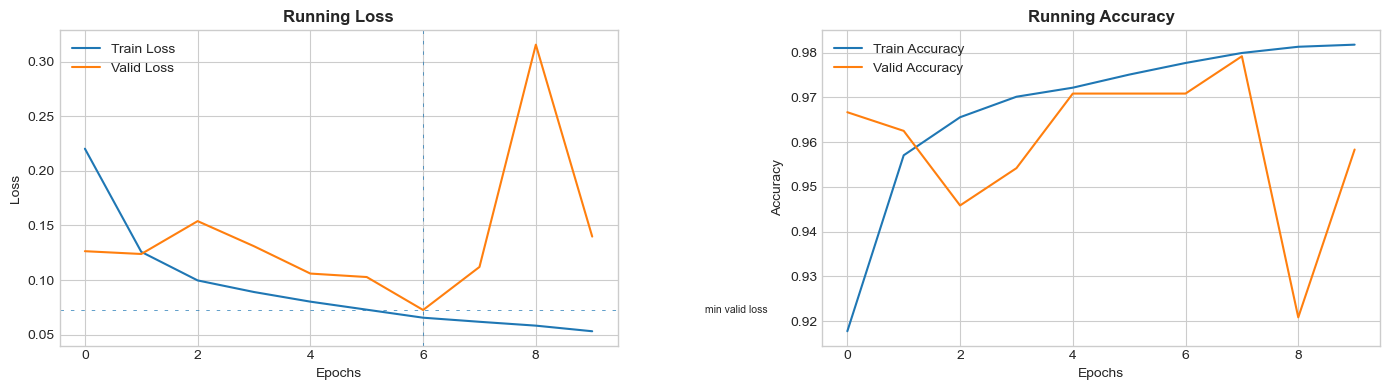

In [8]:
plot_summary('outputs/CSVs/e_vgg.csv')

### ResNet-18

In [8]:
resnet18 = e_networks.get_resnet18(pretrained=True, out_features=4)
resnet18.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Abhijith/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
e_utils.fit(
    epochs=epochs,
    model=resnet18,
    criterion=criterion,
    optimizer=optim.Adam(resnet18.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|███████████████████████████████████████| 4693/4693 [11:50<00:00,  6.61it/s, acc=0.919, loss=0.0273]



		Avg train loss: 0.224618	Avg valid loss: 0.195346

		valid_loss decreased (inf -> 0.195346)
		saving model...



Epoch [ 2/10]: 100%|████████████████████████████████████████| 4693/4693 [11:54<00:00,  6.57it/s, acc=0.957, loss=0.371]



		Avg train loss: 0.124260	Avg valid loss: 0.157367

		valid_loss decreased (0.195346 -> 0.157367)
		saving model...



Epoch [ 3/10]: 100%|██████████████████████████████████████| 4693/4693 [11:54<00:00,  6.57it/s, acc=0.969, loss=0.00433]



		Avg train loss: 0.091378	Avg valid loss: 0.119869

		valid_loss decreased (0.157367 -> 0.119869)
		saving model...



Epoch [ 4/10]: 100%|███████████████████████████████████████| 4693/4693 [11:50<00:00,  6.61it/s, acc=0.976, loss=0.0449]



		Avg train loss: 0.069624	Avg valid loss: 0.114474

		valid_loss decreased (0.119869 -> 0.114474)
		saving model...



Epoch [ 5/10]: 100%|███████████████████████████████████████| 4693/4693 [11:49<00:00,  6.62it/s, acc=0.979, loss=0.0549]



		Avg train loss: 0.060254	Avg valid loss: 0.118775



Epoch [ 6/10]: 100%|█████████████████████████████████████████| 4693/4693 [11:49<00:00,  6.62it/s, acc=0.983, loss=0.29]



		Avg train loss: 0.050698	Avg valid loss: 0.110630

		valid_loss decreased (0.114474 -> 0.110630)
		saving model...



Epoch [ 7/10]: 100%|███████████████████████████████████████| 4693/4693 [11:49<00:00,  6.62it/s, acc=0.986, loss=0.0114]



		Avg train loss: 0.041180	Avg valid loss: 0.106151

		valid_loss decreased (0.110630 -> 0.106151)
		saving model...



Epoch [ 8/10]: 100%|███████████████████████████████████████| 4693/4693 [26:40<00:00,  2.93it/s, acc=0.986, loss=0.0101]



		Avg train loss: 0.040039	Avg valid loss: 0.128805



Epoch [ 9/10]: 100%|███████████████████████████████████████| 4693/4693 [11:50<00:00,  6.60it/s, acc=0.99, loss=0.00425]



		Avg train loss: 0.032156	Avg valid loss: 0.087696

		valid_loss decreased (0.106151 -> 0.087696)
		saving model...



Epoch [10/10]: 100%|███████████████████████████████████████| 4693/4693 [11:51<00:00,  6.60it/s, acc=0.99, loss=0.00599]



		Avg train loss: 0.028707	Avg valid loss: 0.108647



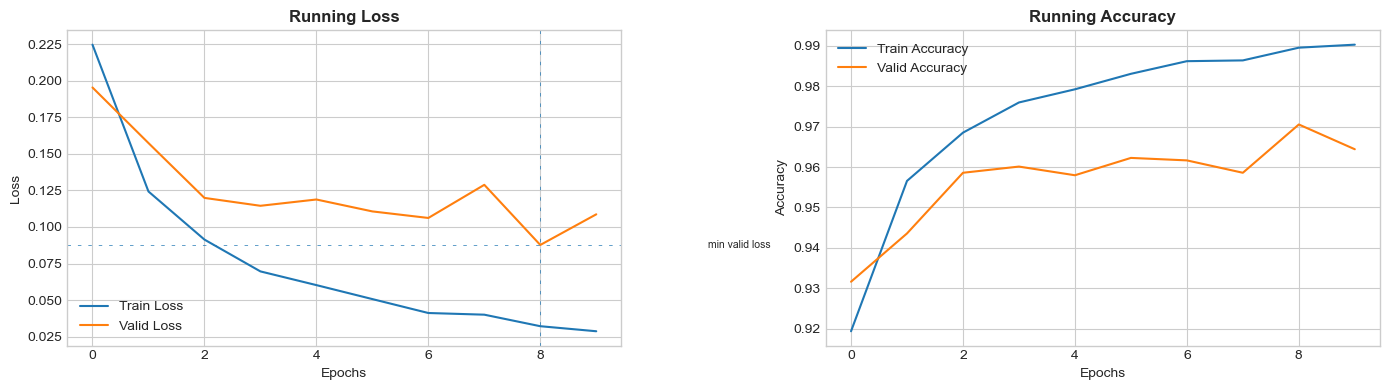

In [10]:
plot_summary('outputs/CSVs/e_resnet.csv')

### EfficientNet-B0

In [5]:
efficientnet_b0 = e_networks.get_efficientnet_b0(pretrained=True, out_features=4)
efficientnet_b0.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [6]:
e_utils.fit(
    epochs=epochs,
    model=efficientnet_b0,
    criterion=criterion,
    optimizer=optim.Adam(efficientnet_b0.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|████████████████████████████████████████| 4693/4693 [18:53<00:00,  4.14it/s, acc=0.871, loss=0.341]



		Avg train loss: 0.467720	Avg valid loss: 0.199740

		valid_loss decreased (inf -> 0.199740)
		saving model...



Epoch [ 2/10]: 100%|███████████████████████████████████████| 4693/4693 [19:03<00:00,  4.10it/s, acc=0.941, loss=0.0129]



		Avg train loss: 0.160735	Avg valid loss: 0.146159

		valid_loss decreased (0.199740 -> 0.146159)
		saving model...



Epoch [ 3/10]: 100%|███████████████████████████████████████| 4693/4693 [19:11<00:00,  4.07it/s, acc=0.96, loss=0.00385]



		Avg train loss: 0.114514	Avg valid loss: 0.111678

		valid_loss decreased (0.146159 -> 0.111678)
		saving model...



Epoch [ 4/10]: 100%|████████████████████████████████████████| 4693/4693 [18:52<00:00,  4.14it/s, acc=0.969, loss=0.114]



		Avg train loss: 0.091259	Avg valid loss: 0.100557

		valid_loss decreased (0.111678 -> 0.100557)
		saving model...



Epoch [ 5/10]: 100%|███████████████████████████████████████| 4693/4693 [18:51<00:00,  4.15it/s, acc=0.973, loss=0.0497]



		Avg train loss: 0.075790	Avg valid loss: 0.094803

		valid_loss decreased (0.100557 -> 0.094803)
		saving model...



Epoch [ 6/10]: 100%|███████████████████████████████████████| 4693/4693 [19:12<00:00,  4.07it/s, acc=0.977, loss=0.0453]



		Avg train loss: 0.066587	Avg valid loss: 0.101073



Epoch [ 7/10]: 100%|██████████████████████████████████████| 4693/4693 [19:12<00:00,  4.07it/s, acc=0.982, loss=0.00786]



		Avg train loss: 0.053369	Avg valid loss: 0.094370

		valid_loss decreased (0.094803 -> 0.094370)
		saving model...



Epoch [ 8/10]: 100%|██████████████████████████████████████| 4693/4693 [19:04<00:00,  4.10it/s, acc=0.984, loss=0.00169]



		Avg train loss: 0.046714	Avg valid loss: 0.087766

		valid_loss decreased (0.094370 -> 0.087766)
		saving model...



Epoch [ 9/10]: 100%|█████████████████████████████████████| 4693/4693 [19:06<00:00,  4.09it/s, acc=0.986, loss=0.000298]



		Avg train loss: 0.039766	Avg valid loss: 0.079016

		valid_loss decreased (0.087766 -> 0.079016)
		saving model...



Epoch [10/10]: 100%|██████████████████████████████████████| 4693/4693 [18:59<00:00,  4.12it/s, acc=0.988, loss=0.00625]



		Avg train loss: 0.033908	Avg valid loss: 0.078452

		valid_loss decreased (0.079016 -> 0.078452)
		saving model...



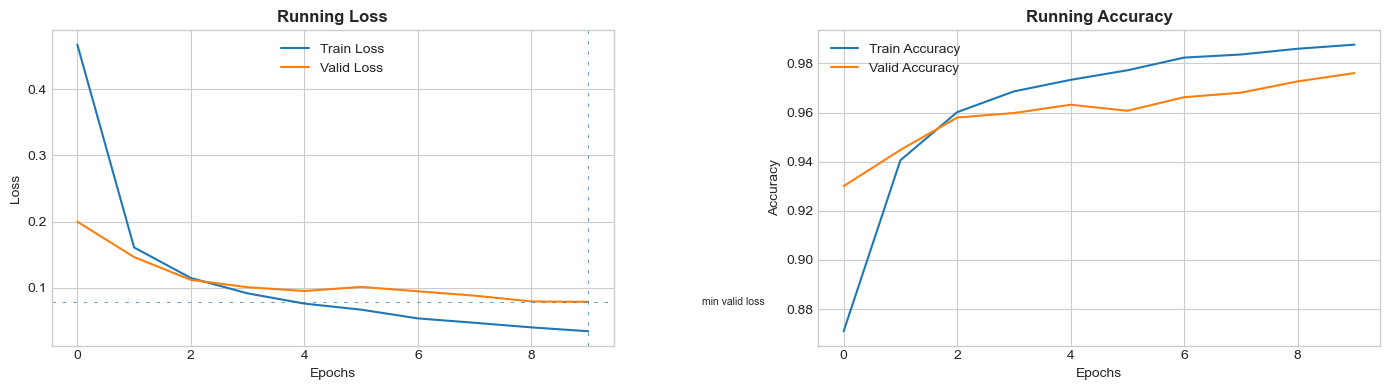

In [7]:
plot_summary('outputs/CSVs/e_efficientnet.csv')

### DenseNet-121

In [ ]:
densenet121 = e_networks.get_densenet121(pretrained=True, out_features=4)
densenet121.cuda()

In [ ]:
e_utils.fit(
    epochs=epochs,
    model=densenet121,
    criterion=criterion,
    optimizer=optim.Adam(densenet121.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

In [ ]:
plot_summary('outputs/CSVs/e_densenet.csv')

### Ensemble

In [5]:
ensemble = e_ensemble.EnsembleModel(torchvision.models.alexnet(pretrained=True),
                                    torchvision.models.resnet18(pretrained=True),
                                    torchvision.models.efficientnet_b0(pretrained=True))
for param in torchvision.models.alexnet(pretrained=True).parameters():
    param.requires_grad = False

for param in torchvision.models.resnet18(pretrained=True).parameters():
    param.requires_grad = False   

for param in torchvision.models.efficientnet_b0(pretrained=True).parameters():
    param.requires_grad = False   

ensemble= ensemble.to(device)

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most

In [ ]:
e_utils.fit(
    epochs=epochs,
    model=ensemble,
    criterion=criterion,
    optimizer=optim.Adam(ensemble.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/10]: 100%|███████████████████████████████████████| 4693/4693 [38:06<00:00,  2.05it/s, acc=0.925, loss=0.0806]



		Avg train loss: 0.202085	Avg valid loss: 0.225564

		valid_loss decreased (inf -> 0.225564)
		saving model...



Epoch [ 2/10]: 100%|████████████████████████████████████████| 4693/4693 [38:31<00:00,  2.03it/s, acc=0.957, loss=0.354]



		Avg train loss: 0.120143	Avg valid loss: 0.136147

		valid_loss decreased (0.225564 -> 0.136147)
		saving model...



Epoch [ 3/10]: 100%|███████████████████████████████████████| 4693/4693 [38:46<00:00,  2.02it/s, acc=0.968, loss=0.0165]



		Avg train loss: 0.089199	Avg valid loss: 0.115822

		valid_loss decreased (0.136147 -> 0.115822)
		saving model...



Epoch [ 4/10]: 100%|███████████████████████████████████████| 4693/4693 [38:57<00:00,  2.01it/s, acc=0.974, loss=0.0176]



		Avg train loss: 0.074875	Avg valid loss: 0.111234

		valid_loss decreased (0.115822 -> 0.111234)
		saving model...



Epoch [ 5/10]:  51%|███████████████████▏                  | 2371/4693 [19:28<18:33,  2.09it/s, acc=0.494, loss=0.00781]

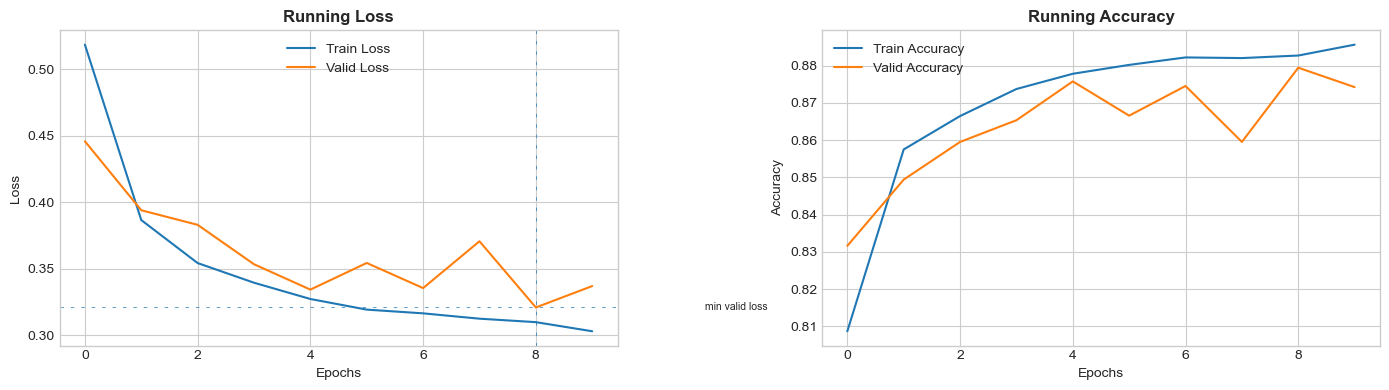

In [7]:
plot_summary('outputs/CSVs/e_ensemblemodel.csv')